In [19]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd 
import json 
import pathlib

In [20]:
def get_data_from_dir(root_data_dir, seeds=[12,31,64]):
    all_data = pd.DataFrame(columns=["ratio", "perc", "seed", "type_name", "acc", "intent"], dtype=object)

    root_data_dir = pathlib.Path(root_data_dir)
    test_files = root_data_dir.glob("*/*/test_metrics.json")
    for file in test_files:

        try:
            data = json.load(open(file))
        except json.JSONDecodeError:
            data = {}
            data['acc'] = np.nan
            data[f'fxn_acc'] = np.nan

        setting = file.parent.parent.name
        seed = file.parent.name
        ratio, perc = setting.split("_")
        
        ratio, perc = float(ratio), float(perc)

        if abs(ratio - 0.50) < 0.06:
            ratio = 0.50

        to_add = {"ratio": ratio, "perc": perc, "seed": int(seed), "type_name": 'total', 
                "acc": data['acc'] * 100, "intent": 50}
        all_data = all_data.append(to_add, ignore_index=True)

        to_add = {"ratio": ratio, "perc": perc, "seed": int(seed), "type_name": 'play_radio', 
                "acc": data['50_acc'] * 100, "intent": 50}
        all_data = all_data.append(to_add, ignore_index=True)

    return all_data 

In [21]:
df = get_data_from_dir("/brtx/604-nvme1/estengel/intent_conj_diverse/")

<AxesSubplot:xlabel='perc', ylabel='acc'>

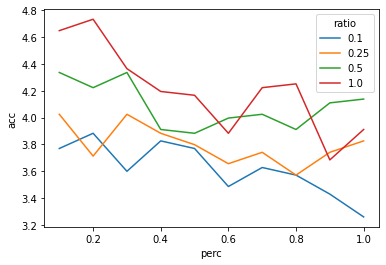

In [28]:


# df_small = df[df['ratio'] == 0.10]
# df_small = df[df['perc'] > 0.5]
df_small = df
# print(df_small)
df_small = df_small[df_small['type_name'] == 'play_radio']
sns.lineplot(data=df_small, x = "perc", y = "acc", hue="ratio", palette = "tab10", err_style=None)

